Import libraries

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Import linear regression data

In [13]:
df = pd.read_csv("../../../data/data.csv")

print(df.isnull().values.sum()) # Check evey key if it has Null, summaries them, calculates as number eventually.
print(f"Shape: {df.shape}")
print(f"Variables: {df.keys()}")
print(f"The first data content:\n{df.iloc[0,::]}")
print(f'The first predicted goal: {df["Weight"][0]}') # I am not sure is this operation match the title, I think it's not.

0
Shape: (15, 2)
Variables: Index(['Height', 'Weight'], dtype='object')
The first data content:
Height     1.47
Weight    52.21
Name: 0, dtype: float64
The first predicted goal: 52.21


Setup figures

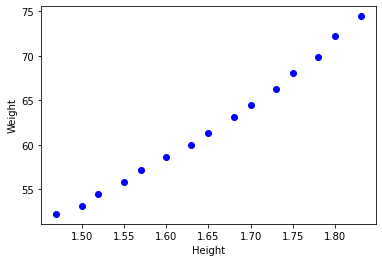

In [14]:
plt.scatter(df.Height, df.Weight, color="b")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.savefig(f"../pictures/Original_Data.jpg")

Prepare train data and test data for model

In [15]:
x = df.drop("Weight", axis=1)
y = df["Weight"]

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Original data shape: {df.shape}")
print(f"Tranning data shape: {train_x.shape}")
print(f"Testing data shape: {test_x.shape}")

Original data shape: (15, 2)
Tranning data shape: (12, 1)
Testing data shape: (3, 1)


Trainning

In [16]:
model = LinearRegression()
model.fit(train_x, train_y)
print(f"Coefficients: {model.coef_}")    # 模型係數
print(f"Intercept: {model.intercept_}")  # 截距

Coefficients: [63.13171913]
Intercept: -42.178608958837785


Import test data to model for predictions and calculate MSE

Using formula `MSE(Mean Square Error)` to fine a least `Loss` line

$$MSE = \frac{\sum_{i=1}^{n}(yi-\hat{y}i)^2}{n}$$

In [75]:
pred = model.predict(test_x)
score = mean_squared_error(pred, test_y)
print(f"MSE: {score}")

[1.7]


Linear regression

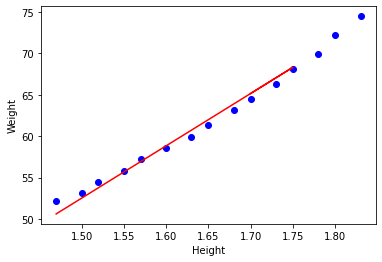

In [76]:
plt.scatter(x, y, color="b")
plt.plot(test_x.values.tolist(), pred, color="r")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.savefig(f"../pictures/Regression_Data.jpg")